In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

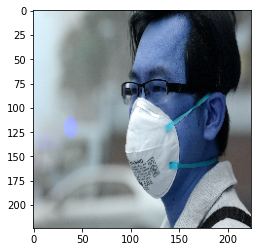

In [4]:
DATADIR="C:/Users/DELL/Jupyter/New Masks Dataset/Train"
categories=['Mask','Non Mask']
for category in categories:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img))  
        img_array = cv2.resize(img_array,(224,224))
        plt.imshow(img_array)  
        plt.show() 

        break
    break

In [5]:
img_array.shape

(224, 224, 3)

In [6]:
data= []
for category in categories:
    path = os.path.join(DATADIR,category)
    label= categories.index(category)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.resize(img_array,(224,224))
        data.append([img_array,label])


In [7]:
import random
random.shuffle(data)

In [8]:
X=[]
y=[]
for features,label in data:
    X.append(features)
    y.append(label)

In [9]:
X=np.array(X)
y=np.array(y)

In [10]:
X.shape

(1006, 224, 224, 3)

In [11]:
y.shape

(1006,)

In [12]:
X=X/255

In [13]:
X[0:]

array([[[[0.03137255, 0.04313725, 0.03529412],
         [0.03921569, 0.05098039, 0.04313725],
         [0.03529412, 0.05490196, 0.05098039],
         ...,
         [0.83921569, 0.51372549, 0.45098039],
         [0.83529412, 0.50980392, 0.45098039],
         [0.83921569, 0.50588235, 0.45098039]],

        [[0.03137255, 0.04313725, 0.03529412],
         [0.03921569, 0.05098039, 0.04313725],
         [0.03529412, 0.05490196, 0.05098039],
         ...,
         [0.84705882, 0.56078431, 0.50588235],
         [0.84705882, 0.55686275, 0.50588235],
         [0.85098039, 0.55294118, 0.50980392]],

        [[0.03529412, 0.04705882, 0.03921569],
         [0.03921569, 0.05098039, 0.04313725],
         [0.03529412, 0.05490196, 0.05098039],
         ...,
         [0.82745098, 0.58431373, 0.54117647],
         [0.82745098, 0.58431373, 0.54117647],
         [0.82745098, 0.58039216, 0.54509804]],

        ...,

        [[0.33333333, 0.36862745, 0.72941176],
         [0.38823529, 0.39607843, 0.84313725]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train.shape

(704, 224, 224, 3)

In [16]:
from keras.applications.vgg16 import VGG16

In [17]:
vgg=VGG16()

In [18]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [20]:
model=Sequential()

In [21]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [23]:
for layer in model.layers:
    layer.trainable=False

In [24]:
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [26]:
opt = Adam(learning_rate = 0.01)

In [27]:
model.compile(optimizer=opt,loss="binary_crossentropy", metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [31]:
history=model.fit(x=X_train, 
          y=y_train, 
          epochs=4,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/4
22/22 [==============================] - 101s 5s/step - loss: 0.1523 - accuracy: 0.9446 - val_loss: 0.1914 - val_accuracy: 0.9272
Epoch 2/4
22/22 [==============================] - 106s 5s/step - loss: 0.2006 - accuracy: 0.9148 - val_loss: 0.2797 - val_accuracy: 0.8808
Epoch 3/4
22/22 [==============================] - 104s 5s/step - loss: 0.1606 - accuracy: 0.9375 - val_loss: 0.1713 - val_accuracy: 0.9139
Epoch 4/4
22/22 [==============================] - 96s 4s/step - loss: 0.1310 - accuracy: 0.9432 - val_loss: 0.1203 - val_accuracy: 0.9437


In [32]:
cap=cv2.VideoCapture(0)

In [ ]:
while True:
    ret, frame = cap.read()
    frame=cv2.resize(frame,(224,224))
    y_pred = detect(frame)
    if y_pred == 0:
        draw_label(frame,"Mask Detected",(40,40),(0,255,0))
    else:
        draw_label(frame,"No Mask Detected",(40,40),(0,255,0))

    cv2.imshow("window",frame)
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
cv2.destroyAllWindows()

In [33]:
def detect(img):
    y_pred = model.predict(img.reshape(1,224,224,3))
    return y_pred[0][0]

In [37]:
def draw_label(img,text,pos,bg_color):
    text_size = cv2.getTextSize(text,cv2.FONT_HERSHEY_PLAIN,1,cv2.FILLED)
    end_x = pos[0] + text_size[0][0] + 2
    end_y = pos[1] + text_size[0][1] - 2
    cv2.rectangle(img,pos,(end_x,end_y),bg_color,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_PLAIN,1,(0,0,0),1,cv2.LINE_AA)